### Train and Test Split

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)
df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','Sound pressure level']
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
X_train, X_test ,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

 For evaluation of different regression models, we make use of mean_squared_error, mean_absolute_error and r2_score from sklearn.metrics.
Here, the test_size=0.33 i.e. 33%. At later point of time, we will see how a model works for different data set division.and the randam data are taken with random state

### Model Selection
we are gonna train the various regression models one by one using training data-set and check for over-fitting of training data-set using the testing set.

We are using root mean squared error, mean absolute error and r2 score as evaluation parameters. The various regression models which will be trained and compared over here are:
1. Linear Regression 
2. Decision tree regression
3. Random forest regression

### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model = LR_model.fit(X_train,y_train)

In [5]:
y_predict = LR_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
print("Root Mean Squeare Error ",rmse)
print('Mean Absolute Error ',mae)
print('R2 Score ',r2)

Root Mean Squeare Error  4.791103164735039
Mean Absolute Error  3.7288137950232927
R2 Score  0.5124474986138432


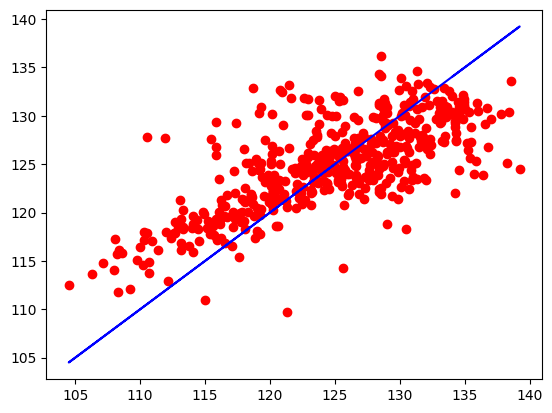

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict,c='r')
plt.plot(y_test,y_test,c='blue')
plt.show()

let’s plot the scatter plot taking predicted values on y-axis and actual values on x-axis for testing data-set. For any pair of predicted and actual values, if the corresponding points lies on the line of slope 1 passing through origin, it indicates that the predicted values are correct.

This means, more the deviation from the line, more the error in prediction.

### Decision Tree Regression

For decision tree regression, we have to import DecisionTreeRegressor from sklearn.tree. This model classifies the regression values into various categories in the form of range of values.

In [11]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=0)
regr = regr.fit(X_train,y_train)

In [12]:
y_predict = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
print("Root Mean Squeare Error ",rmse)
print('Mean Absolute Error ',mae)
print('R2 Score ',r2)

Root Mean Squeare Error  2.7487959592895304
Mean Absolute Error  2.009362903225806
R2 Score  0.8395146655857919


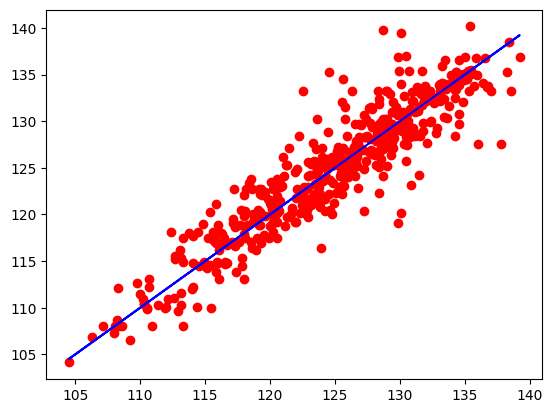

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict,c='r')
plt.plot(y_test,y_test,c='blue')
plt.show()

After compairing the linear Regression model and the Decision Tree the R2 score of Decision Tree is much batter then the Linear Regression and the error are also minimux as we can see in the graph

### Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=3,random_state=0)
regressor = regressor.fit(X_train,y_train)

In [15]:
y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Root Mean Squeare Error ",rmse)
print('Mean Absolute Error ',mae)
print('R2 Score ',r2)

Root Mean Squeare Error  4.654996780864294
Mean Absolute Error  3.6533319168689777
R2 Score  0.5397549630082605


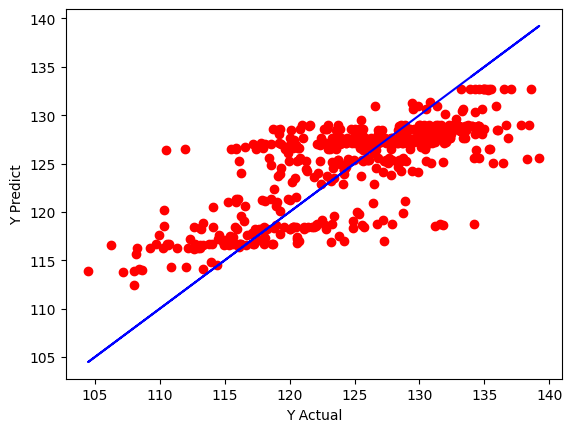

In [18]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='r')
plt.xlabel('Y Actual')
plt.ylabel('Y Predict')
plt.plot(y_test,y_test,c='blue')
plt.show()

## Conclusion

Among all the models tested for the given problem, decision tree regression model best predicts the noise produced by the NACA 002 airfoils. With the R2 Score of 0.8395146655857919

# Pickle
The pickle module implements binary protocols for serializing and de-serializing a Python object structure.

The pickle module keeps track of the objects it has already serialized, so that later references to the same object won’t be serialized again

In [19]:
import pickle
pickle.dump(regr,open('predict_model.pkl','wb'))

here we are pickle the Decision Tree model is pickling